**Project Description**

This project demonstrates the end-to-end process of data analysis, model training, and evaluation for crop data. The trained models can be used to make predictions that can help in improving crop yield and health. The results are visualized to provide a clear understanding of the models' performance and to identify areas for improvement.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data from 'data/cropdata.csv'

df = pd.read_csv('../data/cropdata.csv')
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [3]:
# import label encoder
from sklearn.preprocessing import LabelEncoder


In [6]:
df = df[df['result'] != 2]

df.shape
print(df.shape)
""" print(df[result1 == 0].shape)
print(df[result1 == 1].shape)
print(df[result1 == 2].shape) """

(15289, 7)


' print(df[result1 == 0].shape)\nprint(df[result1 == 1].shape)\nprint(df[result1 == 2].shape) '

In [7]:
# Obtain five rows that shows data
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [8]:
# Perform label encoding on 'soil_type', 'crop ID', and 'Seedling Stage' columns

encoder = LabelEncoder()
df['soil_type'] = encoder.fit_transform(df['soil_type'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['crop ID'] = encoder.fit_transform(df['crop ID'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Seedling Stage'] = encoder.fit_transform(df['Seedling Stage'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


{'Alluvial Soil': 0, 'Black Soil': 1, 'Chalky Soil': 2, 'Clay Soil': 3, 'Loam Soil': 4, 'Red Soil': 5, 'Sandy Soil': 6}
{'Carrot': 0, 'Chilli': 1, 'Potato': 2, 'Tomato': 3, 'Wheat': 4}
{'Flowering': 0, 'Fruit/Grain/Bulb Formation': 1, 'Germination': 2, 'Harvest': 3, 'Maturation': 4, 'Pollination': 5, 'Seedling Stage': 6, 'Vegetative Growth / Root or Tuber Development': 7}


In [9]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,4,1,2,1,25,80.0,1
1,4,1,2,2,26,77.0,1
2,4,1,2,3,27,74.0,1
3,4,1,2,4,28,71.0,1
4,4,1,2,5,29,68.0,1


In [10]:
# Prepare features and target variable, and scale the features

x = df.drop('result', axis=1)
y = df['result']
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity
0,1.04488,-1.396438,-0.677959,-1.511336,-0.344172,0.685703
1,1.04488,-1.396438,-0.677959,-1.474419,-0.241438,0.552780
2,1.04488,-1.396438,-0.677959,-1.437502,-0.138704,0.419857
3,1.04488,-1.396438,-0.677959,-1.400585,-0.035969,0.286934
4,1.04488,-1.396438,-0.677959,-1.363668,0.066765,0.154011


In [11]:
from keras.models import Sequential
from keras.layers import Dense

vanilla = Sequential()
vanilla.add(Dense(64, activation="relu", input_shape=(x.shape[1],)))
vanilla.add(Dense(32, activation="relu"))
vanilla.add(Dense(1, activation="sigmoid"))
vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


**Vanilla Model training**

In [12]:
# Compile the model
vanilla.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

#Train the model
vanilla_train = vanilla.fit(
    x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

Epoch 1/100
383/383 [==============================] - 3s 6ms/step - loss: 0.2447 - accuracy: 0.9013 - precision: 0.9235 - recall: 0.8302 - val_loss: 0.1229 - val_accuracy: 0.9480 - val_precision: 0.9932 - val_recall: 0.8700
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 0.1227 - accuracy: 0.9493 - precision: 0.9510 - recall: 0.9251 - val_loss: 0.1098 - val_accuracy: 0.9555 - val_precision: 0.9952 - val_recall: 0.8879
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 0.1076 - accuracy: 0.9567 - precision: 0.9526 - recall: 0.9423 - val_loss: 0.0947 - val_accuracy: 0.9595 - val_precision: 0.9943 - val_recall: 0.8991
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9601 - precision: 0.9525 - recall: 0.9510 - val_loss: 0.1058 - val_accuracy: 0.9487 - val_precision: 0.9932 - val_recall: 0.8717
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9628

In [13]:
vanilla_loss, vanilla_accuracy, vanilla_precision, vanilla_recall = vanilla.evaluate(x, y)
print(f'Vanilla model - Test Accuracy: {vanilla_accuracy}, Precision: {vanilla_precision}, Recall: {vanilla_recall}, Loss: {vanilla_loss}')


478/478 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.9903 - precision: 0.9971 - recall: 0.9791
Vanilla model - Test Accuracy: 0.9903198480606079, Precision: 0.9970564246177673, Recall: 0.9791231751441956, Loss: 0.1035895124077797


In [14]:
vanilla.save('saved_models/model1.keras')

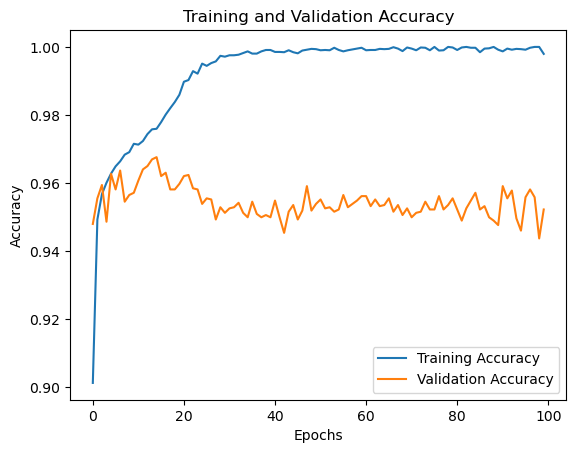

In [15]:
# Plot training and validation accuracy 


plt.plot(vanilla_train.history['accuracy'], label='Training Accuracy')
plt.plot(vanilla_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

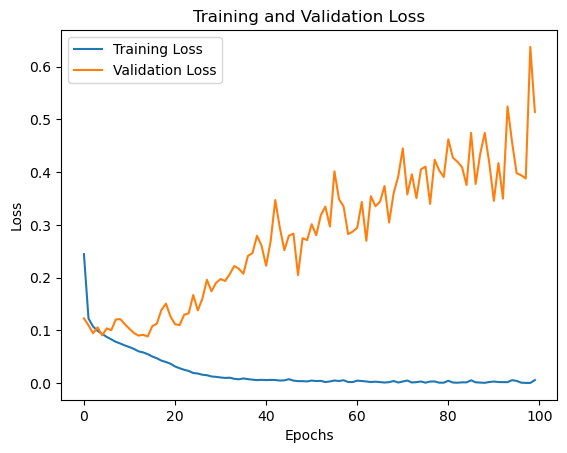

In [16]:
import matplotlib.pyplot as plt


plt.plot(vanilla_train.history['loss'], label='Training Loss')
plt.plot(vanilla_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Regularization with Adam**

In [17]:
# Import necessary libraries and methods

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.callbacks import EarlyStopping


optminal = Sequential()
optminal.add(Dense(64, activation="relu", input_shape=(x.shape[1],), kernel_regularizer=l1(l1=0.001)))
optminal.add(Dropout(0.4))
optminal.add(Dense(32, activation="relu", kernel_regularizer=l1(l1=0.001)))
optminal.add(Dropout(0.4))
optminal.add(Dense(1, activation="sigmoid", kernel_regularizer=l1(l1=0.001)))

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
optminal.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [18]:
optminal.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

optimal_train = vanilla.fit(
    x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)


Epoch 1/100
383/383 [==============================] - 1s 4ms/step - loss: 5.1326e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.3724 - val_accuracy: 0.9578 - val_precision: 0.9745 - val_recall: 0.9136
Epoch 2/100
383/383 [==============================] - 1s 4ms/step - loss: 7.2690e-04 - accuracy: 0.9998 - precision: 0.9998 - recall: 0.9998 - val_loss: 0.4662 - val_accuracy: 0.9526 - val_precision: 0.9785 - val_recall: 0.8956
Epoch 3/100
383/383 [==============================] - 1s 4ms/step - loss: 9.3249e-04 - accuracy: 0.9998 - precision: 1.0000 - recall: 0.9996 - val_loss: 0.4152 - val_accuracy: 0.9549 - val_precision: 0.9769 - val_recall: 0.9033
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0047 - accuracy: 0.9989 - precision: 0.9986 - recall: 0.9986 - val_loss: 0.4181 - val_accuracy: 0.9552 - val_precision: 0.9778 - val_recall: 0.9033
Epoch 5/100
383/383 [==============================] - 2s 6ms/step - loss: 0.0073 - accu

In [50]:
test_loss, test_accuracy, test_precision, test_recall = optminal.evaluate(x, y)
print(f'Test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, Loss: {test_loss}')

478/478 [==============================] - 2s 2ms/step - loss: 1.0040 - accuracy: 0.4764 - precision: 0.2733 - recall: 0.1722
Test Accuracy: 0.47635555267333984, Precision: 0.2732602655887604, Recall: 0.1721535176038742, Loss: 1.0039550065994263


In [53]:
optminal.save('saved_models/model2.keras')

**Training and validation accuracy**

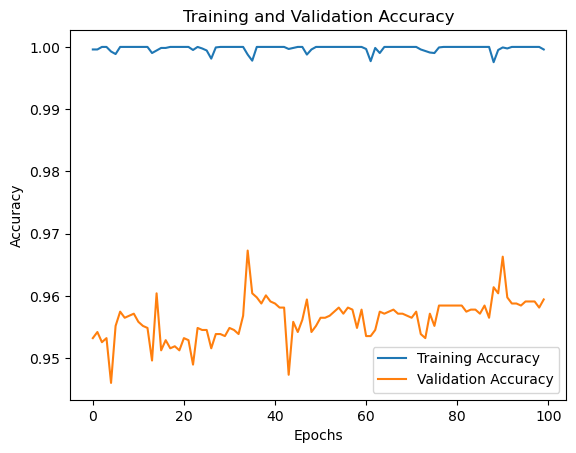

In [56]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt

plt.plot(vanilla_train.history['accuracy'], label='Training Accuracy')
plt.plot(vanilla_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Training and validation Loss**

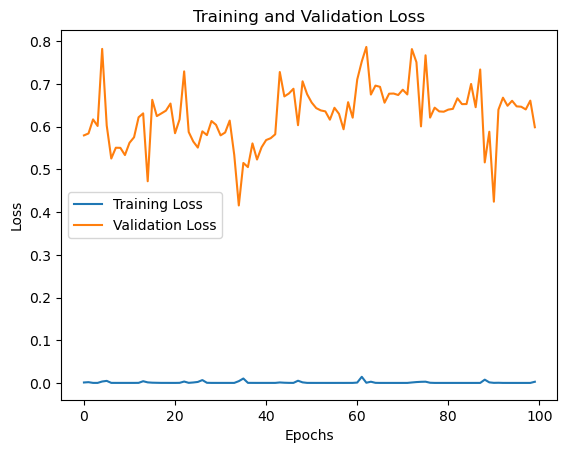

In [55]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(vanilla_train.history['loss'], label='Training Loss')
plt.plot(vanilla_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Error Analysis**

In [78]:
import numpy as np

# Predict for Vanilla model
Y_pred_vanilla = vanilla.predict(x)
Y_pred_vanilla = np.round(Y_pred_vanilla)

# Predict for vanilla model
Y_pred_l1 = vanilla.predict(x)
Y_pred_l1 = np.round(Y_pred_l1)

# Predict for optimnal model
Y_pred_l2 = optminal.predict(x)
Y_pred_l2 = np.round(Y_pred_l2)

478/478 [==============================] - 1s 2ms/step


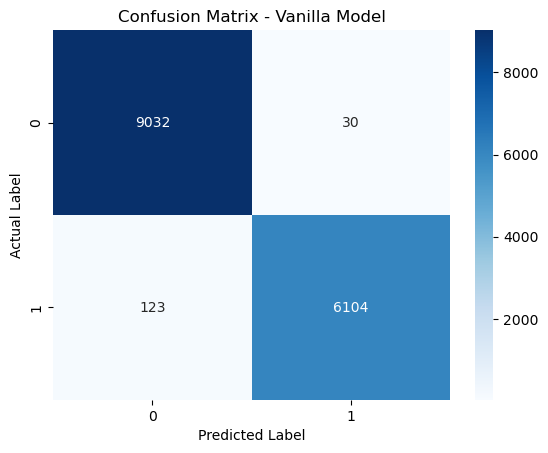

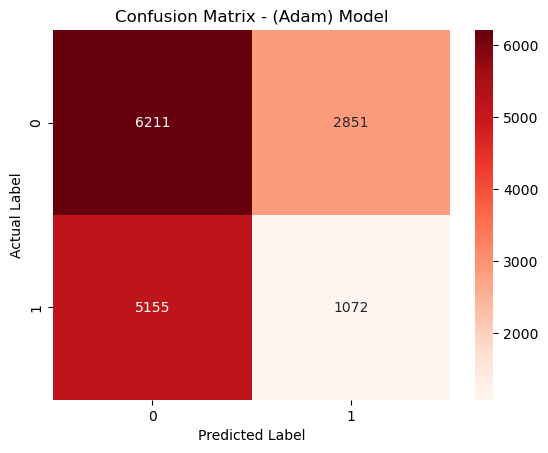

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix - Vanilla Model
vanilla_conf_matrix = confusion_matrix(y, Y_pred_vanilla)
sns.heatmap(vanilla_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Vanilla Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()




#Confusion Matrix - (Adam) Model
l2_conf_matrix = confusion_matrix(y, Y_pred_l2)
sns.heatmap(l2_conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix - (Adam) Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [88]:
# Precision, Recall (Sensitivity), F1 Score for Vanilla Model
vanilla_precision = precision_score(y, Y_pred_vanilla)
vanilla_recall = recall_score(y, Y_pred_vanilla)  # Sensitivity
vanilla_f1 = f1_score(y, Y_pred_vanilla)


# Precision, Recall (Sensitivity), F1 Score for (Adam) Model
l2_precision = precision_score(y, Y_pred_l2)
l2_recall = recall_score(y, Y_pred_l2)  # Sensitivity
l2_f1 = f1_score(y, Y_pred_l2)


In [90]:
# Specificity = TN / (TN + FP) - Vanilla Model
tn, fp, fn, tp = vanilla_conf_matrix.ravel()
vanilla_specificity = tn / (tn + fp)


# Specificity = TN / (TN + FP) - L2 Model
tn, fp, fn, tp = l2_conf_matrix.ravel()
l2_specificity = tn / (tn + fp)

In [97]:
# Printing results for Vanilla Model

print(f"Error Analysis - Vanilla Model:")
print(f"Vanilla Precision: {vanilla_precision:.4f}")
print(f"Vanilla Recall (Sensitivity): {vanilla_recall:.4f}")
print(f"Vanilla Specificity: {vanilla_specificity:.4f}")
print(f"Vanilla F1 Score: {vanilla_f1:.4f}")


# Printing results for (Adam)
print(f"\n \nError Analysis - (Adam) Model:")
print(f"L2 Precision: {l2_precision:.4f}")
print(f"L2 Recall (Sensitivity): {l2_recall:.4f}")
print(f"L2 Specificity: {l2_specificity:.4f}")
print(f"L2 F1 Score: {l2_f1:.4f}")

Error Analysis - Vanilla Model:
Vanilla Precision: 0.9951
Vanilla Recall (Sensitivity): 0.9802
Vanilla Specificity: 0.9967
Vanilla F1 Score: 0.9876

 
Error Analysis - (Adam) Model:
L2 Precision: 0.2733
L2 Recall (Sensitivity): 0.1722
L2 Specificity: 0.6854
L2 F1 Score: 0.2112
